In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Load CSV
df = pd.read_csv('BurnOut1.csv')

In [3]:
#Score Ranges
score_columns = ['Score'] + [f'Score.{i}' for i in range(1, 26)]

In [5]:
# List with corresponding questions
question_texts = []
for score_col in score_columns:
    score_index = df.columns.get_loc(score_col)
    question_text = df.columns[score_index - 1]
    question_texts.append(question_text)

In [6]:
# Replace non-numeric values with NaN and calculate the total score
df[score_columns] = df[score_columns].apply(pd.to_numeric, errors='coerce')
total_scores = df[score_columns].sum()

In [7]:
# Create a DataFrame question text and the total score
score_df = pd.DataFrame({'Question': question_texts, 'TotalScore': total_scores.values})

In [9]:
# Sort top 5 questions by total score
top_5_scores = score_df.nlargest(5, 'TotalScore')

# Creating a Pie chart for highest 5 and lowest 5 responses

/var/folders/2m/j6ql78x14931wns3gsw7blrr0000gn/T/ipykernel_61187/3634578972.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


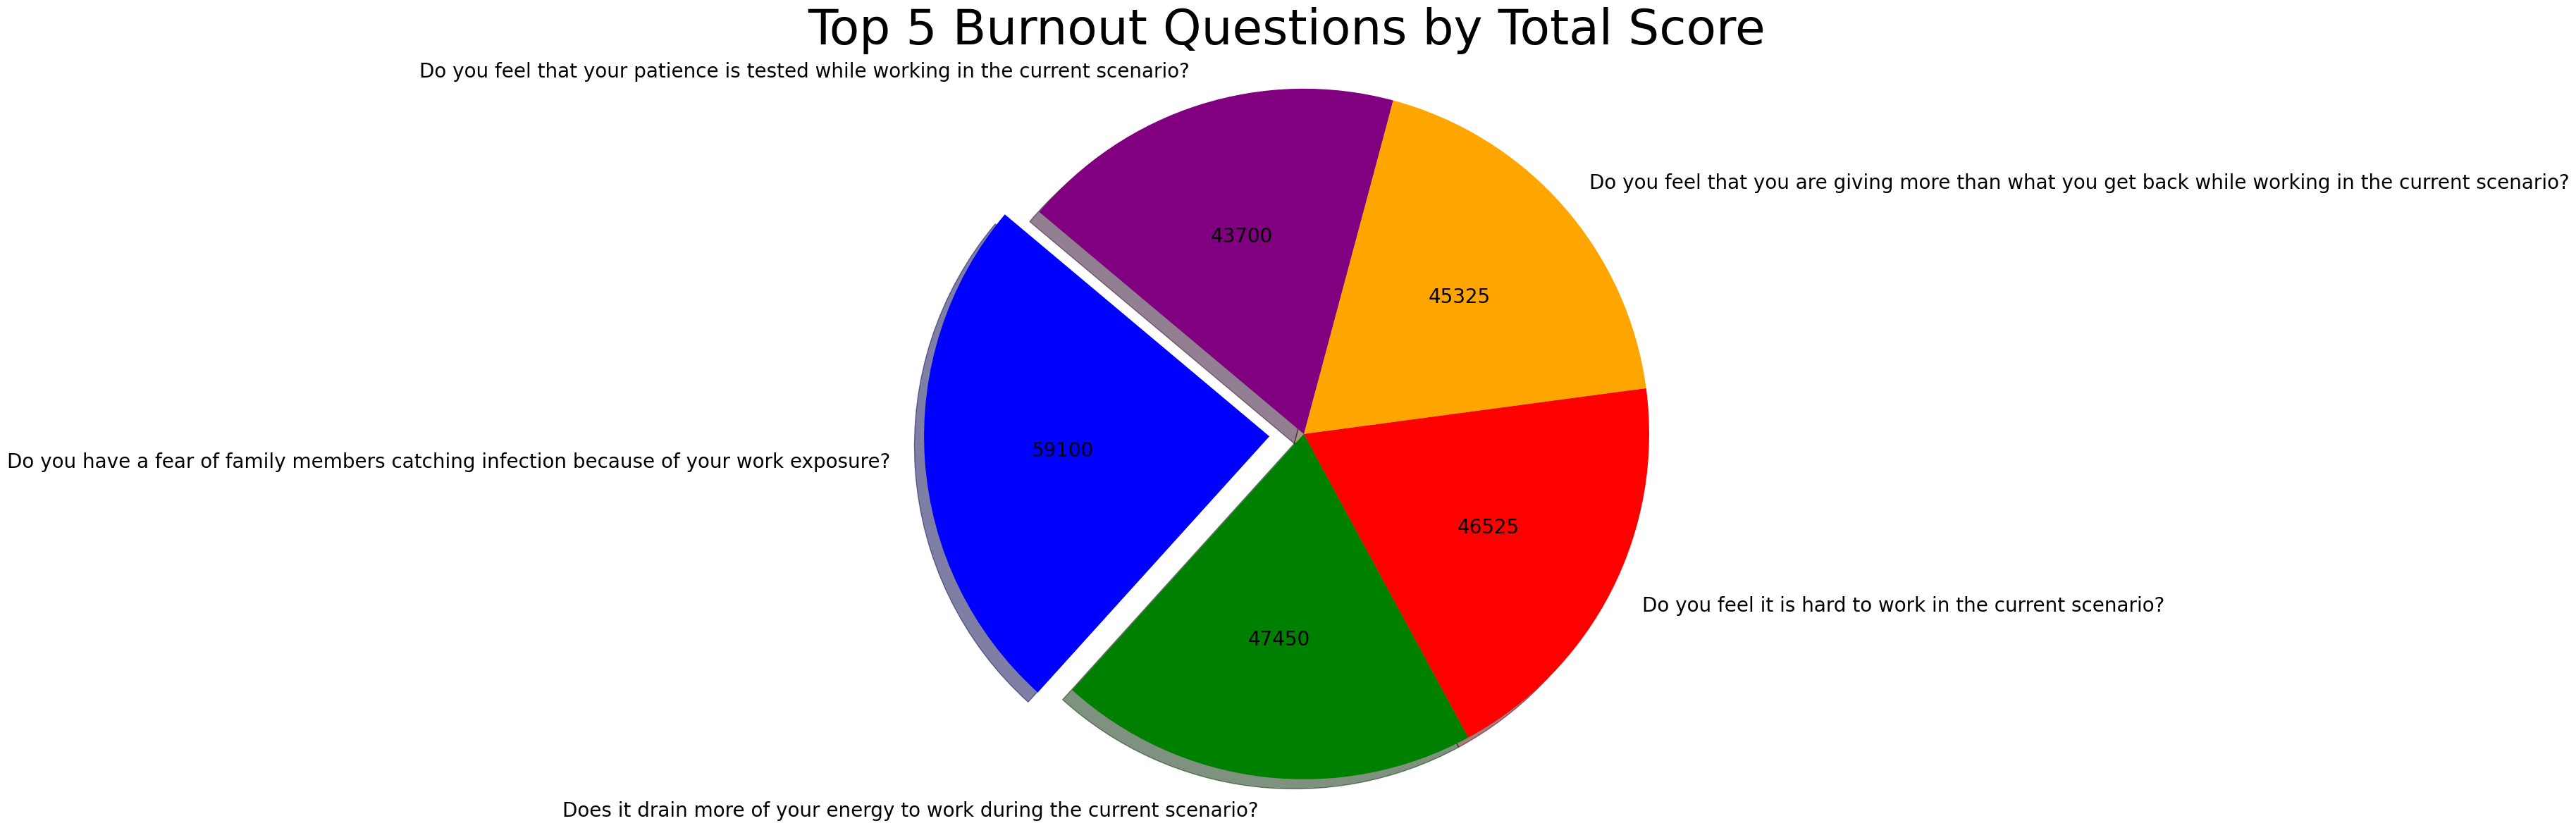

In [116]:
import matplotlib.pyplot as plt

# Define a custom function for autopct to display absolute values
def absolute_value(val):
    a = round(val/100.*sum(top_5_scores['TotalScore']), 0)
    return int(a)

# Customizations
labels = [
    "Do you have a fear of family members catching infection because of your work exposure?",
    "Does it drain more of your energy to work during the current scenario?",
    "Do you feel it is hard to work in the current scenario?",
    "Do you feel that you are giving more than what you get back while working in the current scenario?",
    "Do you feel that your patience is tested while working in the current scenario?"
]
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice 

# Figure size
plt.figure(figsize=(18, 14))  # Increase figure size

# Pie chart
plt.pie(
    top_5_scores['TotalScore'],
    colors=colors,
    labels=labels,
    autopct=absolute_value,  # Custom function used here
    startangle=140,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 20}
)

# Title and equal aspect ratio
plt.title('Top 5 Burnout Questions by Total Score', fontsize=50)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.



plt.tight_layout()
plt.show()


# Top 5 Burnout Questions by Total Score

## Description and Analysis

#### The findings from the pie chart reflecting top 5 burnout related questions for healthcare employees during Covid-19 express the following. The most prominent concern for causing burnout is the fear workers have for family members contracting infection due to exposure. This indicates burnout is not solely based on workload or work enviornment, but also from emotional burden and stress of loved ones. This pie chart also concludes that working during pandemic to be emotionally and physically draining. Workers are experiencing challenges based on volume of patients, new protocols, and stressful work environemnt. Lastly, workers are reporting a percieved lack of support and feel that their patience is being tested to the max. From these findings, we can find the an investment in Emotional support programs, worklife balance intitiaves, and adequate compensation and benefits could help reduce burnout.  

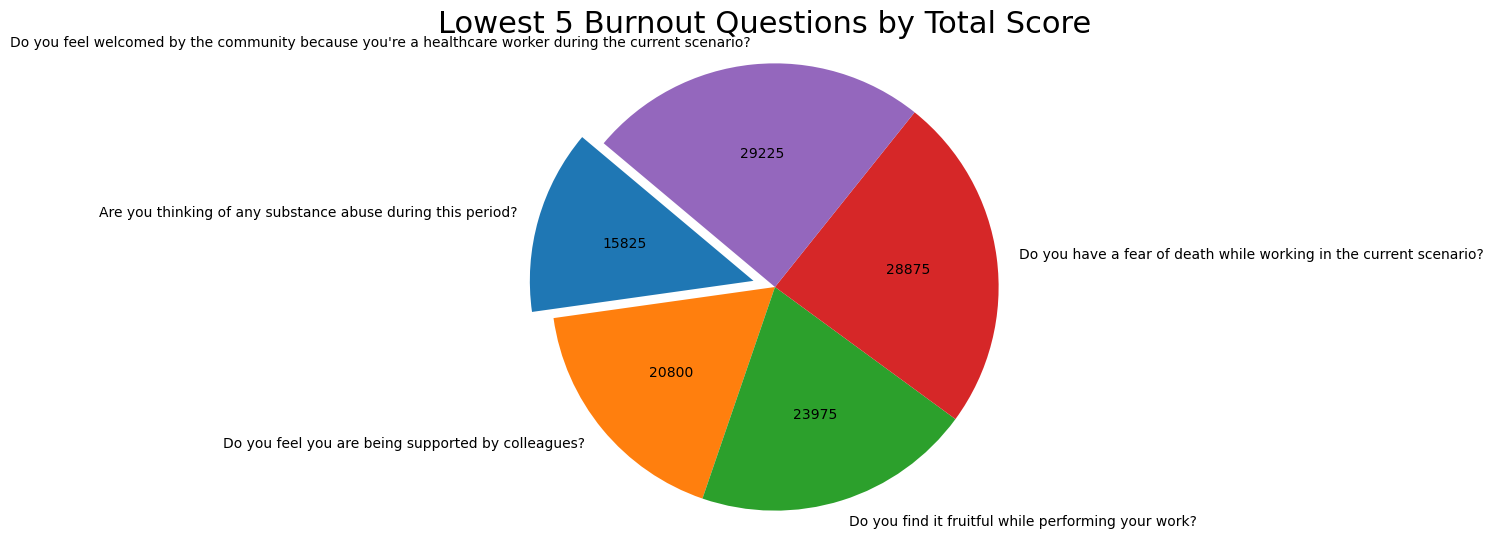

In [124]:
import matplotlib.pyplot as plt

# Custom function to show the absolute count
def absolute_value(val, total):
    absolute = int(round(val/100.*total.sum()))
    return "{:d}".format(absolute)

# Sort to lowest 5 questions by total score percentage
lowest_5_scores = score_df.nsmallest(5, 'TotalScore')

# Calculate the total score to use in the custom autopct function
total_scores = lowest_5_scores['TotalScore'].sum()

# Plot the pie chart for the lowest 5 burnout questions
plt.figure(figsize=(10, 6))
plt.pie(
    lowest_5_scores['TotalScore'],
    labels=[
        "Are you thinking of any substance abuse during this period?",
        "Do you feel you are being supported by colleagues?",
        "Do you find it fruitful while performing your work?",
        "Do you have a fear of death while working in the current scenario?",
        "Do you feel welcomed by the community because you're a healthcare worker during the current scenario?"
    ],
    explode=(0.1, 0, 0, 0, 0),  # Only "explode" the 1st slice
    autopct=lambda val: absolute_value(val, lowest_5_scores['TotalScore']),  # Use custom function
    startangle=140
)
plt.title('Lowest 5 Burnout Questions by Total Score', fontsize=22)
plt.axis('equal')

plt.subplots_adjust(top=0.93) 

plt.show()


# Lowest 5 Burnout Questions by Total Score

## Description and Analysis

#### The findings from the pie chart reflecting lowest 5 burnout related questions express the following. At the bottom for lowest response rate asked if workers were at risk for substance abuse, this suggest that despite stress and potential burnout, they might not be coping by resorting to such measures. Secondly, the findings express that workers felt a sense of fulfillment and purpose in their roles as well as camaraderie, mutual support amongst peers and the outside community. Lastly, the chart shows that althought working in healthcare during a pandemic workers did not find a fear of death to be overwhelming. From these point healthcare instituions and community leaders should consider to reinforce access to mental health support, encourage strong peer support, maintain safety measures and protocols, and continued engagement from outside community members. 

In [96]:
# Define the column names for the scores
score_columns = ['Score.1', 'Score.2', 'Score.3', 'Score.4', 'Score.5',
                 'Score.6', 'Score.7', 'Score.8', 'Score.9', 'Score.10',
                 'Score.11', 'Score.12', 'Score.13', 'Score.14', 'Score.15',
                 'Score.16', 'Score.17', 'Score.18', 'Score.19', 'Score.20',
                 'Score.21', 'Score.22', 'Score.23', 'Score.24', 'Score.25']

In [97]:
# extract question texts
question_texts = [df.columns[df.columns.get_loc(score) - 1] for score in score_columns]

In [98]:
# Calculate the sum for each score column for the rows 2 through 645
scores_sum = df.iloc[1:646][score_columns].sum()

In [25]:
# DataFrame with the score sums and their corresponding questions
scores_df = pd.DataFrame({
    'Question': question_texts,
    'ScoreSum': scores_sum.values
})

In [26]:
# Sort by 'ScoreSum' to get the scores from lowest to highest
sorted_scores = scores_df.sort_values(by='ScoreSum')

# Creating a list view of lowest to highest responses

In [91]:
# Print sorted list with the question texts
for index, row in sorted_scores.iterrows():
    print(f"• {row['Question']}: {row['ScoreSum']}\n")


• Client Related burnout [Are you thinking of any substance abuse (alcohol/drugs/smoking) during this period of lockdown?]: 15825.0

• Client Related burnout [Do you feel you are being supported by colleagues during the current scenario?]: 20775.0

• Client Related burnout [Do you find it fruitful while performing your work during the current scenario?]: 23950.0

• Client Related burnout [Do you have a fear of death while working in the current scenario?]: 28875.0

• Client Related burnout [Do you feel welcomed by the community because you are a health care worker and working in the current scenario?]: 29200.0

• Client Related burnout [Do you hesitate to work during this current scenario?]: 31100.0

• Work-related Burnout [Do you have enough energy for family and friends during leisure time?]: 32300.0

• Personal Burnout [How often do you feel weak and susceptible to illness?]: 32825.0

• Personal Burnout [How often do you think: â€œI canâ€™t take it anymore?]: 34030.0

• Client Relat